# Serie 2

## Aufgabe 2.1

In einer Klasse wurden in einer Statistik-Prüfung folgende Noten geschrieben:

4.2,2.3,5.6,4.5,4.8,3.9,5.9,2.4,5.9,6,4,3.7,5,5.2,4.5,3.6,5,6,2.8,3.3,5.5,4.2,4.9,5.1

a) Ändern Sie drei Noten im Datensatz so ab, dass der Median gleich bleibt, aber
der Mittelwert sich stark ändert.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
grades = pd.Series([4.2,2.3,5.6,4.5,4.8,3.9,5.9,2.4,5.9,6,4,3.7,5,5.2,4.5,3.6,5,6,2.8,3.3,5.5,4.2,4.9,5.1])

In [3]:
grades.median()

4.65

In [4]:
grades.mean()

4.5125

In [5]:
grades_copy = grades.sort_values()
# Modify the index
grades_copy.index = np.arange(1, grades_copy.size+1)
print(grades_copy)
print("Median: " + str(grades_copy.median()))
print("Mean: " + str(grades_copy.mean()))

1     2.3
2     2.4
3     2.8
4     3.3
5     3.6
6     3.7
7     3.9
8     4.0
9     4.2
10    4.2
11    4.5
12    4.5
13    4.8
14    4.9
15    5.0
16    5.0
17    5.1
18    5.2
19    5.5
20    5.6
21    5.9
22    5.9
23    6.0
24    6.0
dtype: float64
Median: 4.65
Mean: 4.5125


In [6]:
grades_copy[14] = 6.0
grades_copy[15] = 6.0
grades_copy[16] = 6.0
print("Median: " + str(grades_copy.median()))
print("Mean: " + str(grades_copy.mean()))

Median: 4.65
Mean: 4.641666666666667


b) Erstellen Sie zu den beiden Datensätzen je ein Histogramm und einen Boxplot.
Verwenden Sie `plt.subplot(...)` aus Aufgabe 1.

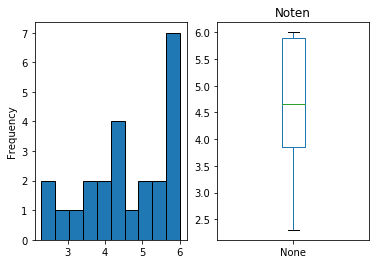

In [47]:
plt.subplot(121)
grades_copy.plot(kind="hist", edgecolor="black")
plt.subplot(122)
grades_copy.plot(kind="box", title="Noten")
plt.show()

## Aufgabe 2.2
21 Labors bestimmten den Kupfergehalt von 9 verschiedenen Klärschlammproben.
Die Daten stehen in der auf Ilias abgelegten Datei klaerschlamm.dat zur Verfü-
gung. Die erste Spalte bezeichnet das Labor, die restlichen 9 Spalten sind die ver-
schiedenen Klärschlammproben. Die Daten (in mg/kg) können mit dem Befehl

``` python
schlamm = pd.read_table(r" * klaerschlamm.dat", sep=" ", index_col=0)
```

eingelesen werden (für * wieder der Dateipfad). Die erste Spalte `Labor` wollen wir
noch entfernen, da sie uns nicht interessiert.

``` python
schlamm = schlamm.drop("Labor",1)
schlamm.head()
```

a) Erstellen Sie für jede Probe einen Boxplot, und berechnen Sie jeweils das arith-
metische Mittel und den Median. Bei welchen Proben gibt es Ausreisser, und
wounterscheidensich arithmetischesMittel undMedianwesentlich? Beiwelchen
der 9 Proben ist es plausibel, dass die wahre Konzentration unter 400 mg/kg
liegt?

__Python-Hinweise__:
```python
schlamm.describe()
schlamm.plot(kind="box")
```

In [8]:
schlamm = pd.read_table(r"klaerschlamm.dat", sep=" ", index_col=0)
schlamm = schlamm.drop("Labor",1)

In [9]:
schlamm.describe()

,Pr1,Pr2,Pr3,Pr4,Pr5,Pr6,Pr7,Pr8,Pr9
count,21.000000,21.000000,21.000000,21.000000,21.000000,21.000000,21.000000,21.000000,21.000000
mean,246.142857,511.428571,443.428571,389.238095,188.238095,394.857143,465.523810,449.952381,388.904762
std,18.210672,76.962050,34.156363,56.642656,16.866845,56.642110,91.361162,57.069673,104.159927
min,216.000000,268.000000,378.000000,223.000000,157.000000,337.000000,110.000000,323.000000,319.000000
25%,239.000000,491.000000,422.000000,373.000000,178.000000,366.000000,456.000000,423.000000,350.000000
50%,244.000000,521.000000,446.000000,390.000000,188.000000,385.000000,481.000000,451.000000,369.000000
75%,257.000000,530.000000,459.000000,405.000000,200.000000,393.000000,493.000000,467.000000,382.000000
max,296.000000,732.000000,548.000000,562.000000,221.000000,557.000000,642.000000,639.000000,819.000000


Median:
Pr1    244.0
Pr2    521.0
Pr3    446.0
Pr4    390.0
Pr5    188.0
Pr6    385.0
Pr7    481.0
Pr8    451.0
Pr9    369.0
dtype: float64

Mean:
Pr1    246.142857
Pr2    511.428571
Pr3    443.428571
Pr4    389.238095
Pr5    188.238095
Pr6    394.857143
Pr7    465.523810
Pr8    449.952381
Pr9    388.904762
dtype: float64


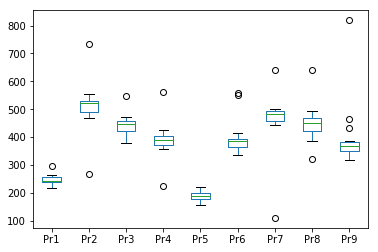

In [10]:
schlamm.plot(kind="box")
print("Median:")
print(schlamm.median())
print("\nMean:")
print(schlamm.mean())

Bei Probe 2, 3, 7, 8 ist es plausibel das die Konzentration über 400mg/kg liegt.

b) Erstellen Sie für jedes Labor einen Boxplot der Messfehler. Unter dem Messfehler eines Labors bei einer Probe verstehen wir den gemessenen Wert minus den Median über alle Labors. Welche der 21 Labors haben systematischeFehler in ihrem Analyseverfahren? Welche haben grosse Zufallsfehler, und beiwelchen Labors ist die Qualität der Analysen besonders gut?

__Python__-Hinweise: Wir ziehen zunächst von jeder Spalte den Median ab
```python
schlamm_centered = schlamm - schlamm.median()
```
und zeichnen den Boxplot mit vertauschten Zeilen und Spalten. Dies geschieht mit dem Attribut __.T__
```python
schlamm_centered.T.plot(kind="box")
```

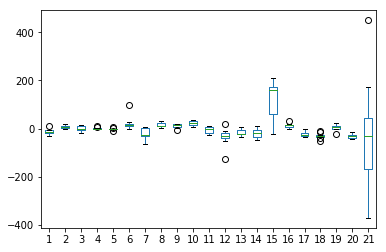

In [15]:
schlamm_centered = schlamm - schlamm.median()
schlamm_centered.T.plot(kind="box")

Die Labors 15 und 21 haben systematische Messfehler, 6 und 12 grosse Zufallsfehler.

## Aufgabe 2.3

Für drei Stichproben vom Umfang n = 100 wurden je ein Boxplot und die empirische Verteilungsfunktion gezeichnet. Ordnen Sie die drei Boxplots den entsprechenden empirischen Verteilungsfunktionen zu:
![Boxplot und Verteilungsfunktionen](img/Boxplot.png)

1 -> c

2 -> b

3 -> a

# Aufgabe 2.4

EdwinHubbleuntersuchte seit 1920 am Mount Wilson Observatory die Eigenschaften von Galaxien ausserhalb der Milchstrasse. Mit Überraschung bemerkte er einen Zusammenhang zwischen der Distanz einer Galaxie zur Erde und dessen Geschwindigkeit, sich von der Erde fortzubewegen (Fluchtgeschwindigkeit). Hubbles ursprüngliche Daten von 24 galaktischen Nebeln ( E. Hubble, "‘Proceedings of the National Academy of Science 15 (1929): 168-73"’) sind in Tabelle 1 gezeigt. Die Fluchtgeschwindigkeit ist in Kilometer pro Sekunde angegeben und konnte aufgrund der Rotverschiebung im Lichtspektrum der Galaxien mit grosser Genauigkeit bestimmt werden. Die Distanz einer Galaxie zur Erde wird in Megaparsec (Mpc) gemessen: ein Megaparsec entspricht etwa 3.09 × 10 10 m. Die Distanzen werden durch Vergleich der mittleren Luminosität von Galaxien mit der Luminosität von bestimmten bekannten Sternen bestimmt, wobei diese Methode relativ ungenau ist.

![Zusammenhang zwischen Distanz und Fluchtgeschwindigkeit von Galaxien](img/GalaxyEscapeVelocity.png)
Tabelle 1: Zusammenhang zwischen Distanz und Fluchtgeschwindigkeit von Galaxien.

a) Erstellen Sie von den Daten in Tabelle 1 ein Streudiagramm, in dem Sie die Distanz versus Fluchtgeschwindigkeit aufzeichnen.
Lesen Sie dazu die Datei ein:
```python
hubble = pd.read_table(r" * hubble.txt", sep=" ")
```

In [22]:
hubble = pd.read_table(r"hubble.txt", sep=" ")
hubble.describe()

,distance,recession.velocity
count,24.000000,24.000000
mean,0.911375,373.125000
std,0.645496,371.254666
min,0.032000,-220.000000
25%,0.406250,165.000000
50%,0.900000,295.000000
75%,1.175000,537.500000
max,2.000000,1090.000000


b) Bestimmen Sie mit dem Befehl `np.polyfit(...)` (siehe Skript) die Koeffizienten $\beta_0$ und $\beta_1$ für die Regressionsgerade

$y = \beta_0 + \beta_1 x$

Zeichnen Sie die Regressionsgerade (siehe Skript) in das Streudiagramm ein.

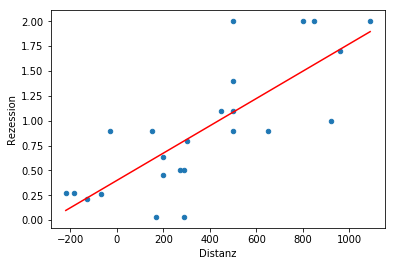

In [18]:
hubble.plot(kind="scatter", x='recession.velocity', y='distance')
b, a = np.polyfit(hubble["recession.velocity"], hubble["distance"], deg=1)
x = np.linspace(hubble["recession.velocity"].min(),hubble["recession.velocity"].max())
plt.plot(x, a+b*x, c="red")
plt.xlabel("Distanz")
plt.ylabel("Rezession")
plt.show()

c) Bestimmen Sie noch den Korrelationskoeffizienten und interpretieren Sie 
diesen.

In [21]:
print("r: " + str(hubble.corr().iloc[0,1]))
print("r^2: " + str(hubble.corr().iloc[0,1]**2))

r: 0.7896394879353181
r^2: 0.6235305209067514


Positiver linearer Zusammenhang: Je weiter entfernt die Galaxie von der Erde ist desto schneller bewegt sie sich von der Erde weg.

## Aufgabe 2.5

Wir betrachten eine Studie, die 1979 in den Vereinigten Staaten durchgeführt wurde (National Longitudinal Study of Youth, NLSY79): von 2584 Amerikanern im Jahr 1981 wurde der Intelligenzquotient (gemäss AFQT - armed forces qualifying test score) gemessen; 2006 wurden dieselben Personen nach ihrem jährlichen Einkommen im Jahr 2005 und der Anzahl Jahre Schulbildung befragt. Uns interessiert hier natürlich, ob ein hoher IQ oder eine lange Schulbildung zu einem höheren Einkommen führen. In der auf Ilias abgelegten Datei `income.dat` finden Sie den Datensatz mit dem Einkommen, der Anzahl Jahre abgeschlossener Schulbildung und den ermittelten Intelligenzquotienten von 2584 Amerikanern.

a) Lesen Sie den Datensatz `income.dat` ein
```python
income = pd.read_table(r" * income.dat", sep=" ")
```
und generieren Sie Streudiagramme, in welchen das Einkommen versus Anzahl Jahre Schulbildung und Einkommen versus Intelligenzquotient aufgetragen sind.

In [26]:
income = pd.read_table(r"income.dat", sep=" ")
income.describe()

,AFQT,Educ,Income2005
count,2584.000000,2584.000000,2584.000000
mean,54.436702,13.890867,49416.998839
std,27.761409,2.503519,46727.925028
min,0.000000,6.000000,63.000000
25%,31.475000,12.000000,23000.000000
50%,56.801000,13.000000,38231.000000
75%,78.071750,16.000000,61000.000000
max,100.000000,20.000000,703637.000000


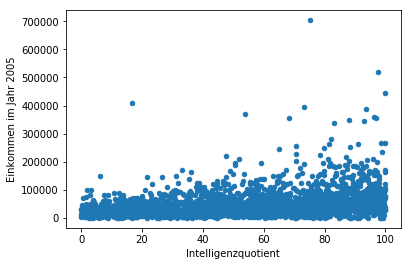

In [31]:
income.plot(kind="scatter", x="AFQT", y="Income2005")
plt.xlabel("Intelligenzquotient")
plt.ylabel("Einkommen im Jahr 2005")
plt.show()

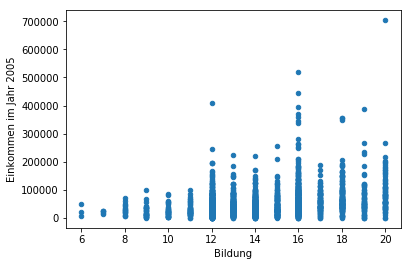

In [32]:
income.plot(kind="scatter", x="Educ", y="Income2005")
plt.xlabel("Bildung")
plt.ylabel("Einkommen im Jahr 2005")
plt.show()

b) Bestimmen Sie die Parameter $a$ und $b$ des linearen Modells $y = a + bx$, wobei $y$
das Einkommen bezeichnet und x die Anzahl Jahre Schulbildung. Zeichnen Sie
die Regressionsgerade wie im Skript

```python
x = np.linspace(... , ...)
plt.plot(x, a+b * x, c="orange")
```

Wie interpretieren Sie die Parameter $a$ und $b$?

a: -40199.575352600026 , b: 6451.4745559458


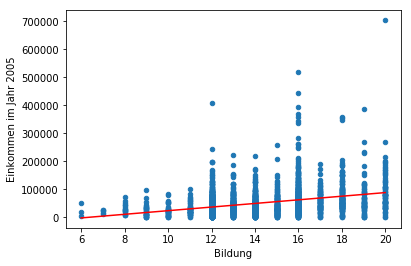

In [45]:
income.plot(kind="scatter", x="Educ", y="Income2005")
b, a = np.polyfit(income["Educ"], income["Income2005"], deg=1)
print("a: " + str(a) + " , b: " + str(b))
x = np.linspace(income["Educ"].min(),income["Educ"].max())
plt.plot(x, a+b*x, c="red")
plt.xlabel("Bildung")
plt.ylabel("Einkommen im Jahr 2005")
plt.show()

c) Berechnen Sie die Korrelation zwischen Einkommen und Anzahl Jahre Schulbildung. Wie angebracht ist ein Regressionsmodell für diesen Datensatz?

In [44]:
income.corr()

,AFQT,Educ,Income2005
AFQT,1.000000,0.595160,0.308153
Educ,0.595160,1.000000,0.345647
Income2005,0.308153,0.345647,1.000000


Es besteht keine lineare Korrelation, weder für Einkommen/IQ noch für Einkommen/Bildung. Interessanterweise besteht eine höhere lineare Korrelation zwischen IQ/Bildung als zum Einkommen.

## Aufgabe 2.6

In dieser Aufgabe betrachten wir 4 Datensätze, die von Anscombe konstruiert wurden.

```python
import matplotlib.pyplot as plt
import numpy as np
x = np.array([10, 8, 13, 9, 11, 14, 6, 4, 12, 7, 5])
y1 = np.array([8.04, 6.95, 7.58, 8.81, 8.33, 9.96, 7.24, 4.26, 10.84, 4.82, 5.68])
y2 = np.array([9.14, 8.14, 8.74, 8.77, 9.26, 8.10, 6.13, 3.10, 9.13, 7.26, 4.74])
y3 = np.array([7.46, 6.77, 12.74, 7.11, 7.81, 8.84, 6.08, 5.39, 8.15, 6.42, 5.73])
x4 = np.array([8, 8, 8, 8, 8, 8, 8, 19, 8, 8, 8])
y4 = np.array([6.58, 5.76, 7.71, 8.84, 8.47, 7.04, 5.25, 12.50, 5.56, 7.91, 6.89])
```

In jedem der Datensätze gibt es eine Zielvariable $y$ und eine erklärende Variable $x$.

a) Stellen Sie jeden der 4 Datensätze als Streudiagramm dar, zeichnen Sie die Regressionsgerade ein und kommentieren Sie die Ergebnisse. Verwenden Sie wieder `plt.subplot(...)` aus Aufgabe 1 und `plt.scatter(...)`.

In [46]:
x = np.array([10, 8, 13, 9, 11, 14, 6, 4, 12, 7, 5])
y1 = np.array([8.04, 6.95, 7.58, 8.81, 8.33, 9.96, 7.24, 4.26, 10.84, 4.82, 5.68])
y2 = np.array([9.14, 8.14, 8.74, 8.77, 9.26, 8.10, 6.13, 3.10, 9.13, 7.26, 4.74])
y3 = np.array([7.46, 6.77, 12.74, 7.11, 7.81, 8.84, 6.08, 5.39, 8.15, 6.42, 5.73])
x4 = np.array([8, 8, 8, 8, 8, 8, 8, 19, 8, 8, 8])
y4 = np.array([6.58, 5.76, 7.71, 8.84, 8.47, 7.04, 5.25, 12.50, 5.56, 7.91, 6.89])

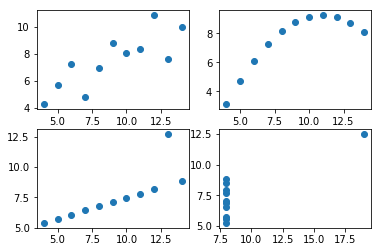

In [49]:
plt.subplot(221)
plt.scatter(x, y1)
plt.subplot(222)
plt.scatter(x, y2)
plt.subplot(223)
plt.scatter(x, y3)
plt.subplot(224)
plt.scatter(x4, y4)
plt.show()

b) Vergleichen Sie die Schätzungen von $\beta_0$ und $\beta_1$ , wobei $y = \beta_0 + \beta_1 x$. Die Schätzungen für die Koeffizienten $\beta_0$ und $\beta_1$ des linearen Regressionsmodells kann man mit `np.polyfit(...)` berechnen und numerisch auswerten.

In [58]:
b0_1, b1_1 = np.polyfit(x, y1, deg=1)
b0_2, b1_2 = np.polyfit(x, y2, deg=1)
b0_3, b1_3 = np.polyfit(x, y3, deg=1)
b0_4, b1_4 = np.polyfit(x4, y4, deg=1)
data = np.matrix([[b0_1, b1_1],
         [b0_2, b1_2],
         [b0_3, b1_3],
         [b0_4, b1_4]])

pd.DataFrame(data, columns=["$b_0$", "$b_1$"])

,$b_0$,$b_1$
0,0.500091,3.000091
1,0.500000,3.000909
2,0.499727,3.002455
3,0.499909,3.001727


c) Berechnen Sie die Korrelationskoeffizienten mit `np.corrcoef(...)`.

In [66]:
pd.DataFrame([np.corrcoef(x,y1)[1][0],
np.corrcoef(x,y2)[1][0],
np.corrcoef(x,y3)[1][0],
np.corrcoef(x4,y4)[1][0]], columns=["r"])


,r
0,0.816421
1,0.816237
2,0.816287
3,0.816521
